In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

import teqp
teqp.__version__

'0.2.1dev'

<IPython.core.display.Javascript object>


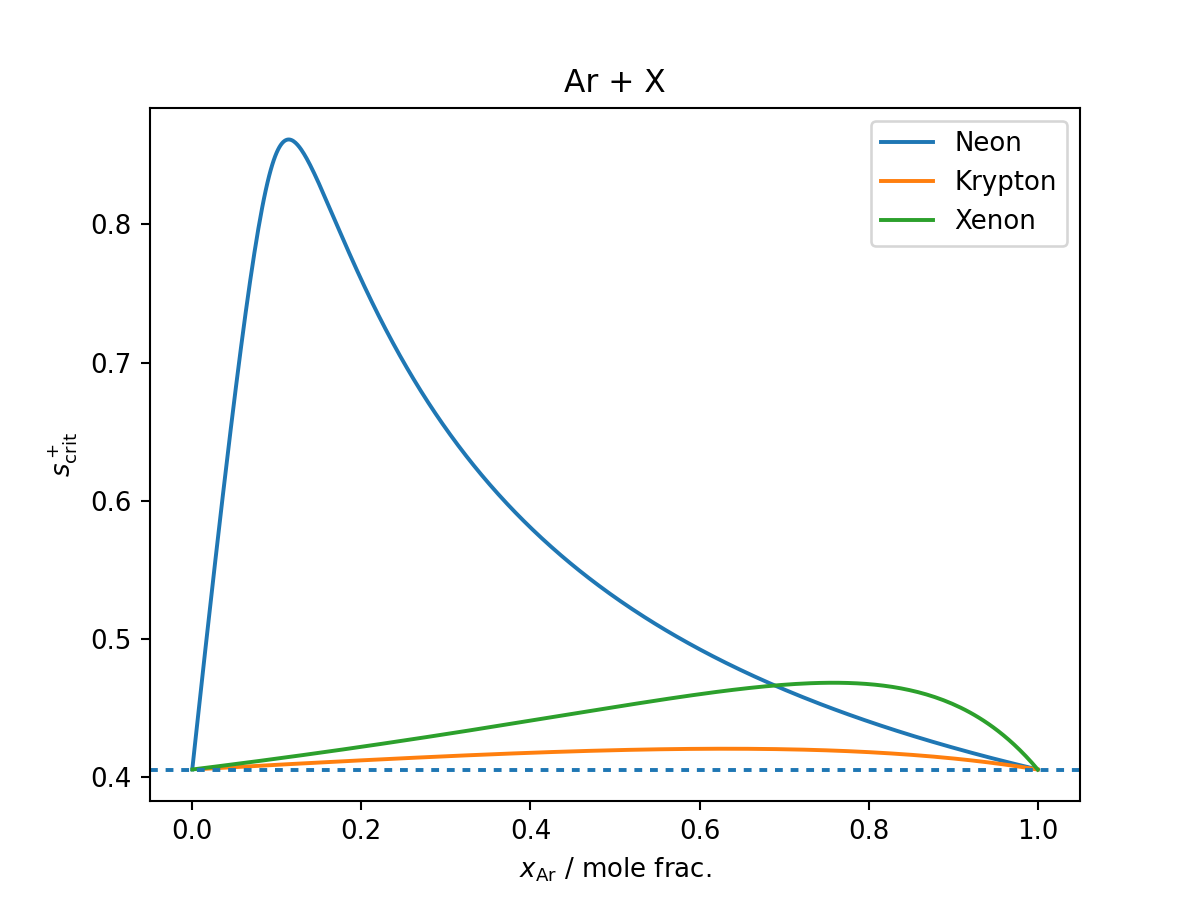

In [23]:
%matplotlib nbagg
def build_vdW(names):
    root = teqp.get_datapath()
    mf = teqp.build_multifluid_model(names, root, root+'/dev/mixtures/mixture_binary_pairs.json',{'estimate':'linear'})
    Tc = mf.get_Tcvec()
    rhoc = 1.0/mf.get_vcvec()
    R = 8.31446261815324
    pc = []
    for i in range(2):
        zpure = np.array([0.0,0.0])
        zpure[i] = 1.0
        pc.append((mf.get_Ar01(Tc[i], rhoc[i], zpure)+1.0)*R*Tc[i]*rhoc[i])
    Zc = 3.0/8.0
    rhoc_vdW = [pc[ifluid] / (R*Tc[ifluid]) / Zc for ifluid in range(len(Tc))]
    return teqp.vdWEOS(Tc, pc), Tc, pc, rhoc_vdW

for other in ['Neon','Krypton','Xenon']:
    names = ['Argon', other]
    model, Tc, pc, rhoc_vdW = build_vdW(names)
    for ifluid in [0]:
        T0 = Tc[ifluid]
        rho0 = np.array([0.0,0.0])
        rho0[ifluid] = rhoc_vdW[ifluid]
        assert(rho0[ifluid]/rho0.sum() == 1.0)
        o = teqp.TCABOptions()
        o.integration_order = 1
        o.init_dt = 100
        curveJSON = teqp.trace_critical_arclength_binary(model, T0, rho0, "", o)
        df = pandas.DataFrame(curveJSON)
        df['z0 / mole frac.'] = df['rho0 / mol/m^3']/(df['rho0 / mol/m^3']+df['rho1 / mol/m^3'])
        plt.plot(df['z0 / mole frac.'], df['s^+'], label=other)
plt.legend(loc='best')
plt.title('Ar + X')
plt.axhline(-np.log(1-1.0/3.0), dashes=[2,2])
plt.gca().set(xlabel=r'$x_{\rm Ar}$ / mole frac.', ylabel=r'$s^+_{\rm crit}$')
plt.savefig('spluscrit_Ar_X.pdf')
plt.show()

<IPython.core.display.Javascript object>


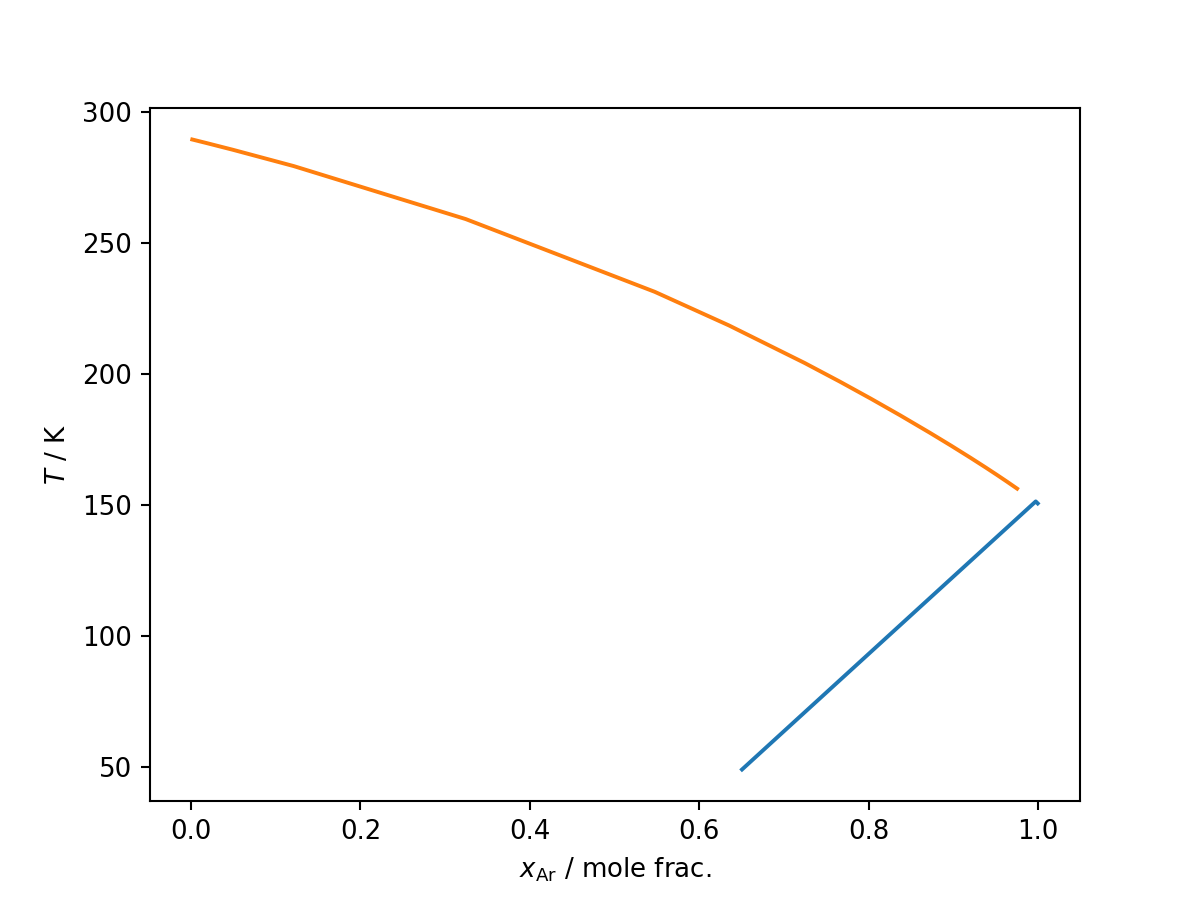

In [10]:
plt.figure()
for ifluid in [0,1]:
    T0 = Tc[ifluid]
    rho0 = np.array([0.0,0.0])
    rho0[ifluid] = rhoc[ifluid]
    curveJSON = teqp.trace_critical_arclength_binary(model, T0, rho0, "")
    df = pandas.DataFrame(curveJSON)
    df['z0 / mole frac.'] = df['rho0 / mol/m^3']/(df['rho0 / mol/m^3']+df['rho1 / mol/m^3'])
    plt.plot(df['z0 / mole frac.'], df['T / K'])

plt.gca().set(xlabel=r'$x_{\rm Ar}$ / mole frac.', ylabel='$T$ / K')
plt.show()